## Ising模型のモンテカルロシミュレーション

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
L = 20 # 系のサイズ。２次元なので、N = L * L
J = 1.0 # 近接相互作用の大きさ

In [ ]:
# 遷移確率の計算
# 座標(i,j)のスピンを反転させた場合の確率を計算。
# Sは現在のスピン配位。betaは逆温度
def transitions(S, L, J, beta, i, j):
  # スピン反転前後のエネルギー差
  dH = 2*J*S[i,j] * ( S[(i-1)%L,j] + S[(i+1)%L,j] + S[i,(j-1)%L] + S[i,(j+1)%L])
  T = np.exp(-dH * beta)

  return np.minimum(T, 1.0)

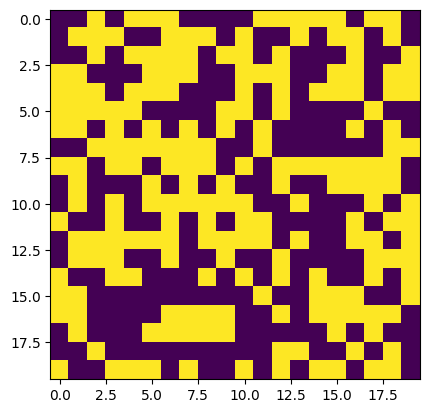

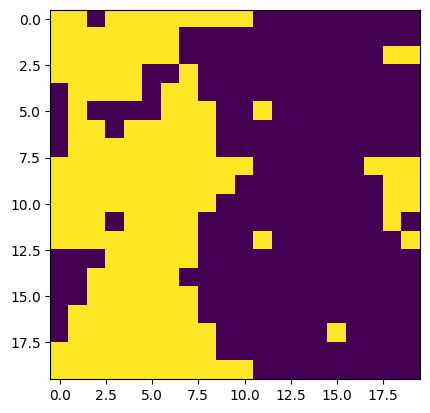

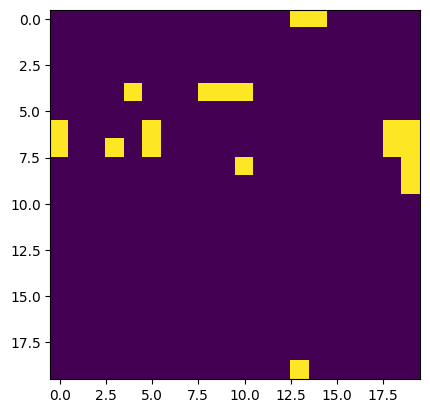

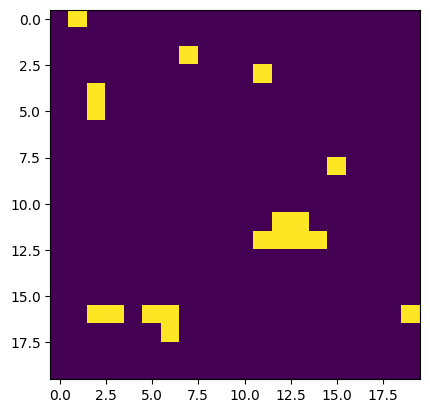

In [ ]:
# nmax回のモンテカルロステップのの実行。30000回毎にスピン配位を描画する。
def run(S, L, J, beta, nmax):
  for n in range(nmax):
    # 0からL-1の中から、ランダムに2つの整数を生成。
    i, j = np.random.randint(0, L, 2)
    # 遷移確率の計算
    T = transitions(S, L, J, beta, i, j)
    # ある確率で座標(i,j)のスピンを反転
    if np.random.rand()<T:
      S[i,j] *= -1
    # 30000回毎に描画
    if n%30000 == 0:
      plt.clf()
      plt.imshow(S)
      plt.pause(1e-5)

beta = 0.5 # 強磁性状態
nmax = 100000
# 初期配位の生成
S0 = 1 - 2*(np.random.rand(L,L)<0.5)
run(S0, L, J, beta, nmax)

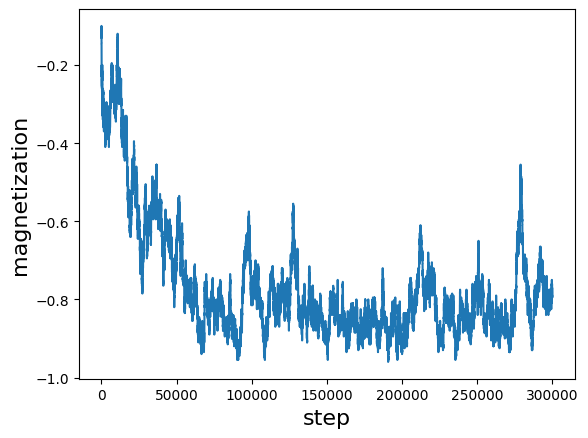

In [ ]:
# 自己相関を避けるために、nmeasure毎にスピンの期待値を計算する関数
def run(S, L, J, beta, nmax, nmeasure):
  Ms = [] # nmeasure毎の磁化
  Ts = [] # 毎回の遷移が成功したかどうか
  for n in range(nmax):
    i, j = np.random.randint(0, L, 2)
    T = transitions(S, L, J, beta, i, j)
    Ts.append(np.random.rand()<T) # trueなら1, falseなら0
    # trueなら反転
    if Ts[-1]==1:
      S[i,j] *= -1
    # nmeasure毎にスピンの期待値の計算
    if n%nmeasure==0: Ms.append(np.average(S))
  return np.array(Ms), np.array(Ts)

beta = 1/2.2 # 転移点付近
nmax = 300000
nmeasure = 1 # 毎回測定する

S0 = 1 - 2*(np.random.rand(L,L)<0.5)
Ms, Ts = run(S0, L, J, beta, nmax, nmeasure)
plt.xlabel("step", fontsize =16)
plt.ylabel("magnetization", fontsize=16)
plt.plot(Ms)
plt.show()

In [ ]:
#更新頻度
np.average(Ts)

np.float64(0.15442666666666666)

In [ ]:
L**2/np.average(Ts)

np.float64(2590.226213089277)

転移点付近でも、100000ステップ後には、熱平衡状態に達していることがわかる。 \
更新頻度<T>は約0.15なので、L*L/T ~ 約2500回で概ね独立な配位が得られることがわかる。

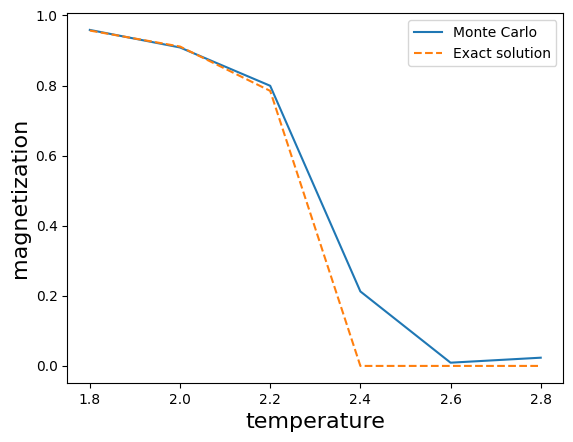

In [ ]:
nmax = 500000    # ステップ総数
ntherm = 100000  # 熱平衡化する前の捨てるべきステップ
nmeasure =  2500 # 独立な配位が得られるステップ数
kBTs = [1.8, 2.0, 2.2, 2.4, 2.6, 2.8] # 温度
Ms, Is = [], []  # スピン期待値と厳密解

for kBT in kBTs:
  S0 = 1 - 2*(np.random.rand(L,L)<0.5)
  M0, _ = run(S0, L, J, 1/kBT, nmax, nmeasure)
  # ntherm回の最初のステップを捨ててから和を取る。
  # A[n:]の書き方で、配列Aの内、n番目から最後までの要素にアクセスできる。
  M = np.average(M0[ntherm//nmeasure:])
  Ms.append(abs(M))
  # 厳密解の値
  if kBT<2.26:
    Is.append((1-1/np.sinh(2*J/kBT)**4)**(1/8))
  else
    Is.append(0.0)

plt.xlabel("temperature", fontsize=16)
plt.ylabel("magnetization", fontsize=16)
plt.plot(kBTs, Ms, ls="solid", label = "Monte Carlo")
plt.plot(kBTs, Is, ls="dashed", label = "Exact solution")
plt.legend()
plt.show()